#### *DIVISIONE DELLE RIGHE CONTENENTI VALORI MULTIPLI*
*Addestramento della rete con dataset del cromosoma 21 e test su dataset del cromosoma 22*

In [1]:
from fastai.tabular.all import *
from warnings import simplefilter
set_seed(42)
simplefilter(action="ignore", category=FutureWarning)

- Divisione dei valori multipli concatenati in stringhe presenti nelle colonne 

In [29]:
df = pd.read_csv('dbsnp.common.20.intervar.hg19_multianno.txt', sep='\t')
df = df.drop(df[df['CLNSIG'] == '.'].index)

In [22]:
df.shape

(3033, 149)

In [30]:
df = df.map(lambda x: x.split(';') if type(x) is str and len(x.split(';')) > 1 else x)
df = df.map(lambda x: x.remove('') if type(x) is list and '' in x else x)

In [31]:
df.head()

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,ExonicFunc.ensGene,AAChange.ensGene,Func.knownGene,Gene.knownGene,GeneDetail.knownGene,ExonicFunc.knownGene,AAChange.knownGene,Otherinfo1,Otherinfo2,Otherinfo3
3652,20,270204,270204,T,C,exonic,C20orf96,.,synonymous SNV,"C20orf96:NM_080571:exon3:c.A180G:p.Q60Q,C20orf96:NM_153269:exon3:c.A183G:p.Q61Q",...,synonymous SNV,"C20orf96:ENST00000360321.7_1:exon3:c.A183G:p.Q61Q,C20orf96:ENST00000400269.4_1:exon3:c.A180G:p.Q60Q",exonic,C20orf96,.,synonymous SNV,"C20orf96:uc010zpi.2:exon2:c.A24G:p.Q8Q,C20orf96:uc002wde.2:exon3:c.A183G:p.Q61Q,C20orf96:uc021vzl.1:exon3:c.A180G:p.Q60Q",.,.,.
4450,20,307204,307204,C,G,exonic,SOX12,.,synonymous SNV,SOX12:NM_006943:exon1:c.C636G:p.A212A,...,synonymous SNV,SOX12:ENST00000342665.5_1:exon1:c.C636G:p.A212A,exonic,SOX12,.,synonymous SNV,SOX12:uc002wdh.4:exon1:c.C636G:p.A212A,.,.,.
4456,20,307296,307296,A,G,exonic,SOX12,.,nonsynonymous SNV,SOX12:NM_006943:exon1:c.A728G:p.E243G,...,nonsynonymous SNV,SOX12:ENST00000342665.5_1:exon1:c.A728G:p.E243G,exonic,SOX12,.,nonsynonymous SNV,SOX12:uc002wdh.4:exon1:c.A728G:p.E243G,.,.,.
4457,20,307300,307300,G,A,exonic,SOX12,.,synonymous SNV,SOX12:NM_006943:exon1:c.G732A:p.T244T,...,synonymous SNV,SOX12:ENST00000342665.5_1:exon1:c.G732A:p.T244T,exonic,SOX12,.,synonymous SNV,SOX12:uc002wdh.4:exon1:c.G732A:p.T244T,.,.,.
4853,20,330317,330317,C,T,exonic,NRSN2,.,synonymous SNV,"NRSN2:NM_001323680:exon3:c.C30T:p.S10S,NRSN2:NM_001323681:exon3:c.C30T:p.S10S,NRSN2:NM_001323685:exon3:c.C30T:p.S10S,NRSN2:NM_024958:exon3:c.C30T:p.S10S,NRSN2:NM_001323679:exon4:c.C30T:p.S10S,NRSN2:NM_001323682:exon4:c.C30T:p.S10S,NRSN2:NM_001323683:exon4:c.C30T:p.S10S,NRSN2:NM_001323684:exon4:c.C30T:p.S10S",...,synonymous SNV,"NRSN2:ENST00000621012.1_1:exon1:c.C30T:p.S10S,NRSN2:ENST00000608736.1_1:exon2:c.C30T:p.S10S,NRSN2:ENST00000382291.7_1:exon3:c.C30T:p.S10S,NRSN2:ENST00000608467.5_1:exon3:c.C30T:p.S10S,NRSN2:ENST00000382285.7_1:exon4:c.C30T:p.S10S",exonic,NRSN2,.,synonymous SNV,NRSN2:uc002wdi.4:exon3:c.C30T:p.S10S,.,.,.


- Prendendo come riferimento la prima colonna che contiene valori multipli (aapos), cerco tutte le colonne con lo stesso numero di valori multipli per poter creare le righe equivalenti

In [32]:
l = []

for col in df.columns:
    if df[col].apply(lambda x: True if type(x) is list and len(x) > 2 else False).any():
        l.append(col)


In [33]:
l

['GeneDetail.refGene',
 'Interpro_domain',
 'GeneDetail.ensGene',
 'GeneDetail.knownGene']

- Divisione in righe dei valori multipli (inoltre, nel caso in cui ci sia una lista che contiene un solo valore, questo valore viene estratto)

In [34]:
for col in l:
    if col == 'Interpro_domain':
        df = df.explode(col)
    else:
        df.drop(col, axis=1, inplace=True)

df = df.map(lambda x: x[0] if type(x) is list else x)

In [35]:
df.head()

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,ExonicFunc.refGene,AAChange.refGene,esp6500siv2_all,...,Gene.ensGene,ExonicFunc.ensGene,AAChange.ensGene,Func.knownGene,Gene.knownGene,ExonicFunc.knownGene,AAChange.knownGene,Otherinfo1,Otherinfo2,Otherinfo3
3652,20,270204,270204,T,C,exonic,C20orf96,synonymous SNV,"C20orf96:NM_080571:exon3:c.A180G:p.Q60Q,C20orf96:NM_153269:exon3:c.A183G:p.Q61Q",0.0138,...,C20orf96,synonymous SNV,"C20orf96:ENST00000360321.7_1:exon3:c.A183G:p.Q61Q,C20orf96:ENST00000400269.4_1:exon3:c.A180G:p.Q60Q",exonic,C20orf96,synonymous SNV,"C20orf96:uc010zpi.2:exon2:c.A24G:p.Q8Q,C20orf96:uc002wde.2:exon3:c.A183G:p.Q61Q,C20orf96:uc021vzl.1:exon3:c.A180G:p.Q60Q",.,.,.
4450,20,307204,307204,C,G,exonic,SOX12,synonymous SNV,SOX12:NM_006943:exon1:c.C636G:p.A212A,.,...,SOX12,synonymous SNV,SOX12:ENST00000342665.5_1:exon1:c.C636G:p.A212A,exonic,SOX12,synonymous SNV,SOX12:uc002wdh.4:exon1:c.C636G:p.A212A,.,.,.
4456,20,307296,307296,A,G,exonic,SOX12,nonsynonymous SNV,SOX12:NM_006943:exon1:c.A728G:p.E243G,0.0039,...,SOX12,nonsynonymous SNV,SOX12:ENST00000342665.5_1:exon1:c.A728G:p.E243G,exonic,SOX12,nonsynonymous SNV,SOX12:uc002wdh.4:exon1:c.A728G:p.E243G,.,.,.
4457,20,307300,307300,G,A,exonic,SOX12,synonymous SNV,SOX12:NM_006943:exon1:c.G732A:p.T244T,0.0049,...,SOX12,synonymous SNV,SOX12:ENST00000342665.5_1:exon1:c.G732A:p.T244T,exonic,SOX12,synonymous SNV,SOX12:uc002wdh.4:exon1:c.G732A:p.T244T,.,.,.
4853,20,330317,330317,C,T,exonic,NRSN2,synonymous SNV,"NRSN2:NM_001323680:exon3:c.C30T:p.S10S,NRSN2:NM_001323681:exon3:c.C30T:p.S10S,NRSN2:NM_001323685:exon3:c.C30T:p.S10S,NRSN2:NM_024958:exon3:c.C30T:p.S10S,NRSN2:NM_001323679:exon4:c.C30T:p.S10S,NRSN2:NM_001323682:exon4:c.C30T:p.S10S,NRSN2:NM_001323683:exon4:c.C30T:p.S10S,NRSN2:NM_001323684:exon4:c.C30T:p.S10S",0.0192,...,NRSN2,synonymous SNV,"NRSN2:ENST00000621012.1_1:exon1:c.C30T:p.S10S,NRSN2:ENST00000608736.1_1:exon2:c.C30T:p.S10S,NRSN2:ENST00000382291.7_1:exon3:c.C30T:p.S10S,NRSN2:ENST00000608467.5_1:exon3:c.C30T:p.S10S,NRSN2:ENST00000382285.7_1:exon4:c.C30T:p.S10S",exonic,NRSN2,synonymous SNV,NRSN2:uc002wdi.4:exon3:c.C30T:p.S10S,.,.,.


- Sostituzione dei valori nulli indicati come punti con np.nan, rimozione delle righe che non hanno un valore di clinvar_clnsig (variabile target), rimozione delle colonne con meno dell'80% di valori non nulli e casting delle colonne a valori interi dove possibile

In [36]:
df.replace(to_replace='.', value=np.nan, inplace=True)
df.dropna(axis='rows', how='any', inplace=True, subset=['CLNSIG'])
df.dropna(axis='columns', thresh=int(len(df.index)*0.8), inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')

In [37]:
l1 = []

for col in df.columns:
    if df[col].map(lambda x: True if type(x) is list else False).any():
        #print(df[col])
        l1.append(col)

for col in l1:
    v = df[col].explode().value_counts()
    toRemove = v[v < int(len(df[col].explode()) * 0.10)].index
    df[col] = df[col].map(lambda x: [i for i in x if i not in toRemove] if type(x) is list else x)

- Raggruppamento delle variabili target nei 5 gruppi dello standard ACGM

In [38]:
df['CLNSIG'].value_counts()

CLNSIG
Benign                                          2671
Likely_benign                                    644
Benign/Likely_benign                             407
Uncertain_significance                           364
Conflicting_interpretations_of_pathogenicity     329
Pathogenic                                        20
risk_factor                                       20
not_provided                                      16
association                                       14
Likely_pathogenic                                  5
drug_response                                      3
Name: count, dtype: int64

In [41]:
df.apply(pd.to_numeric, errors='ignore')
df.replace(to_replace=np.nan, value=0, inplace=True)
df.drop(axis='index', labels=df[df.CLNSIG == 'not_provided'].index, inplace=True)
df.drop(axis='index', labels=df[df.CLNSIG == 'protective'].index, inplace=True)
df.drop(axis='index', labels=df[df.CLNSIG == 'risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.CLNSIG == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.CLNSIG == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
df.drop(axis='index', labels=df[df.CLNSIG == 'association'].index, inplace=True)
df.drop(axis='index', labels=df[df.CLNSIG == 'drug_response'].index, inplace=True)
df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
df.replace(to_replace='Benign/Likely_benign', value='Benign', inplace=True)
df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Pathogenic', inplace=True)
df.reset_index(drop=True, inplace=True)

In [42]:
df.head()

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,1000g2015aug_all,avsnp147,CLNALLELEID,...,gnomAD_genome_AMR,gnomAD_genome_ASJ,gnomAD_genome_EAS,gnomAD_genome_FIN,gnomAD_genome_NFE,gnomAD_genome_OTH,Func.ensGene,Gene.ensGene,Func.knownGene,Gene.knownGene
0,20,270204,270204,T,C,exonic,C20orf96,0.015575,rs114292813,716893,...,0.0024,0.0,0.0,0.0,0.000200,0.0010,exonic,C20orf96,exonic,C20orf96
1,20,307204,307204,C,G,exonic,SOX12,0.003594,rs546352861,742344,...,0.0024,0.0,0.0,0.0,0.000000,0.0010,exonic,SOX12,exonic,SOX12
2,20,307296,307296,A,G,exonic,SOX12,0.004593,rs73574574,742345,...,0.0000,0.0,0.0,0.0,0.000000,0.0020,exonic,SOX12,exonic,SOX12
3,20,307300,307300,G,A,exonic,SOX12,0.003594,rs114569807,705433,...,0.0000,0.0,0.0,0.0,0.000067,0.0020,exonic,SOX12,exonic,SOX12
4,20,330317,330317,C,T,exonic,NRSN2,0.020168,rs34210936,716917,...,0.0036,0.0,0.0,0.0,0.000300,0.0031,exonic,NRSN2,exonic,NRSN2


- Divisione in training set e validation set (80/20) e ricerca delle colonne continue e delle colonne categoriche

In [43]:
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))
df_data = df.drop(columns=['CLNSIG'], inplace=False)
num_cols = df_data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_data.select_dtypes(include=[object]).columns.tolist()
df = df.sample(frac=1).reset_index(drop=True)

- Creazione dell'oggetto per il training contenente tutte le informazioni precedentemente cercate

In [44]:
to = TabularPandas(df, procs=[Categorify, FillMissing],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='CLNSIG',
                    y_block=CategoryBlock(),
                   splits=splits)

- Creazione del dataloader

In [45]:
dls = to.dataloaders(bs=128)
dls.show_batch()

,Ref,Alt,Func.refGene,Gene.refGene,avsnp147,CLNDN,CLNDISDB,CLNREVSTAT,Func.ensGene,Gene.ensGene,Func.knownGene,Gene.knownGene,Chr,Start,End,1000g2015aug_all,CLNALLELEID,gnomAD_genome_ALL,gnomAD_genome_AFR,gnomAD_genome_AMR,gnomAD_genome_ASJ,gnomAD_genome_EAS,gnomAD_genome_FIN,gnomAD_genome_NFE,gnomAD_genome_OTH,CLNSIG
0,C,T,exonic,LAMA5,rs148907937,not_provided,MedGen:CN517202,"criteria_provided,_single_submitter",exonic,LAMA5,exonic,LAMA5,20.0,60893632.0,60893632.0,0.005391,717107.0,0.005700,0.0198,0.0012,0.0000,0.0000,0.0003,0.000067,0.0000,Benign
1,C,T,exonic,PROKR2,rs74315418,Kallmann_syndrome_3|not_provided,"MONDO:MONDO:0009482,MedGen:C3550478,OMIM:244200|MedGen:CN517202","criteria_provided,_conflicting_interpretations",exonic,PROKR2,exonic,PROKR2,20.0,5294762.0,5294762.0,0.000000,18490.0,0.001000,0.0006,0.0012,0.0000,0.0000,0.0006,0.001500,0.0010,Uncertain_significance
2,A,G,intronic,PRPF6,rs201704766,Retinitis_pigmentosa|not_provided,"Human_Phenotype_Ontology:HP:0000547,MONDO:MONDO:0019200,MeSH:D012174,MedGen:C0035334,OMIM:268000,OMIM:PS268000,Orphanet:ORPHA791,SNOMED_CT:28835009|MedGen:CN517202","criteria_provided,_multiple_submitters,_no_conflicts",intronic,PRPF6,intronic,PRPF6,20.0,62642864.0,62642864.0,0.014577,336405.0,0.000300,0.0000,0.0012,0.0000,0.0006,0.0000,0.000300,0.0041,Benign
3,A,G,exonic,JAG1,rs139574260,Alagille_syndrome_1|not_specified|Cardiovascular_phenotype|Isolated_Nonsyndromic_Congenital_Heart_Disease,"MONDO:MONDO:0016862,MedGen:C1956125,OMIM:118450,Orphanet:ORPHA261619|MedGen:CN169374|MedGen:CN230736|MedGen:CN239319","criteria_provided,_multiple_submitters,_no_conflicts",exonic,JAG1,exonic,JAG1,20.0,10632876.0,10632876.0,0.001198,210334.0,0.001100,0.0001,0.0000,0.0000,0.0000,0.0009,0.001900,0.0010,Benign
4,G,A,exonic,EPB41L1,rs150197312,not_provided,MedGen:CN517202,"criteria_provided,_single_submitter",exonic,EPB41L1,exonic,EPB41L1,20.0,34778600.0,34778600.0,0.000998,716941.0,0.001500,0.0049,0.0012,0.0000,0.0000,0.0000,0.000100,0.0010,Benign
5,A,T,exonic,MKKS,rs147882975,McKusick-Kaufman_syndrome|Bardet-Biedl_syndrome,"MONDO:MONDO:0009367,MedGen:C0948368,OMIM:236700,Orphanet:ORPHA2473|MONDO:MONDO:0015229,MedGen:C0752166,OMIM:PS209900,Orphanet:ORPHA110,SNOMED_CT:5619004","criteria_provided,_single_submitter",exonic,MKKS,exonic,MKKS,20.0,10389339.0,10389339.0,0.000599,950980.0,0.000300,0.0009,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,Uncertain_significance
6,C,G,exonic,ADRM1,rs115562292,not_provided,MedGen:CN517202,"criteria_provided,_single_submitter",exonic,ADRM1,exonic,ADRM1,20.0,60878784.0,60878784.0,0.004393,742495.0,0.002400,0.0083,0.0024,0.0000,0.0000,0.0000,0.000000,0.0000,Benign
7,T,C,intronic,SDC4,rs2072792,Type_2_diabetes_mellitus,"Human_Phenotype_Ontology:HP:0005965,Human_Phenotype_Ontology:HP:0005978,Human_Phenotype_Ontology:HP:0100652,MONDO:MONDO:0005148,MeSH:D003924,MedGen:C0011860,OMIM:125853,SNOMED_CT:44054006",no_assertion_criteria_provided,intronic,SDC4,intronic,SDC4,20.0,43964288.0,43964288.0,0.495008,437785.0,0.486200,0.3876,0.6304,0.5133,0.5664,0.5307,0.515700,0.4887,Benign
8,T,C,exonic,ADNP,rs78300927,not_provided,MedGen:CN517202,"criteria_provided,_single_submitter",exonic,ADNP,exonic,ADNP,20.0,49510176.0,49510176.0,0.006789,728725.0,0.005500,0.0195,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,Benign
9,T,C,UTR3,FERMT1,rs529395851,Kindler_syndrome,"MONDO:MONDO:0008260,MedGen:C0406557,OMIM:173650,Orphanet:ORPHA2908,SNOMED_CT:238835001,SNOMED_CT:238836000","criteria_provided,_single_submitter",UTR3,FERMT1,UTR3,FERMT1,20.0,6055702.0,6055702.0,0.001597,351327.0,0.000033,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0010,Likely_benign


- Creazione del learner con parametro gamma che assegna un peso minore alle classi più facilmente classificabili

In [59]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=3))

- Ricerca del learning rate

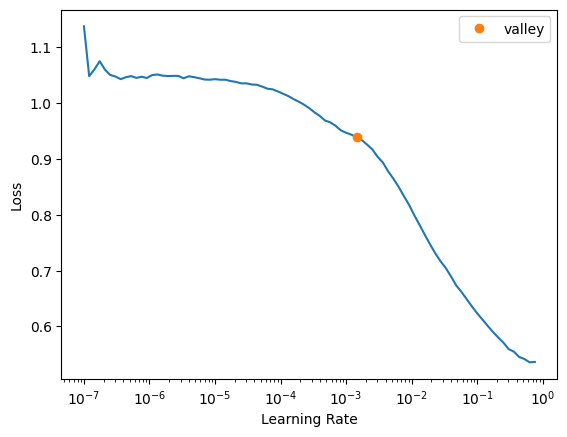

In [60]:
lr = learn.lr_find()

- Training della rete neurale

epoch,train_loss,valid_loss,accuracy,time
0,0.548492,0.973749,0.141892,00:00
1,0.245458,0.274232,0.796171,00:00
2,0.123099,0.165439,0.879505,00:00
3,0.066451,0.145213,0.897523,00:00
4,0.037693,0.155571,0.893018,00:00
5,0.022024,0.152873,0.895270,00:00
6,0.015018,0.177144,0.897523,00:00
7,0.009970,0.157345,0.895270,00:00
8,0.007140,0.180351,0.893018,00:00
9,0.004817,0.175567,0.888514,00:00


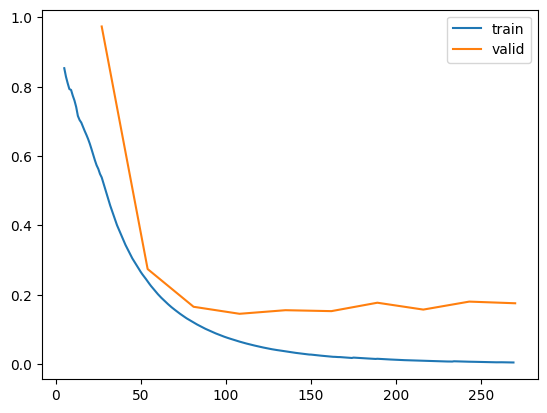

In [61]:
learn.fit(10, lr)
learn.recorder.plot_loss()

- Analisi dei risultati

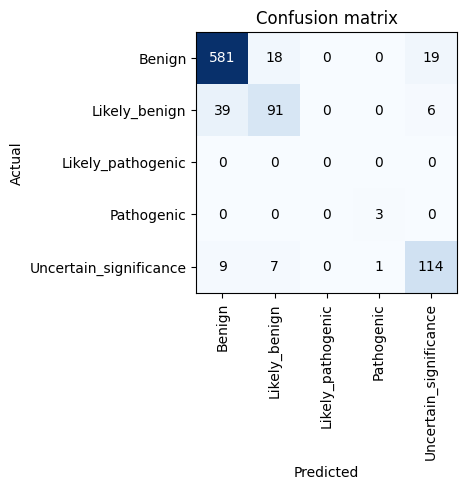

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

- Creazione della random forest per la ricerca dell'importanza delle features

In [63]:
from sklearn.ensemble import RandomForestRegressor

def rf(xs, y, n_estimators=40, max_samples=3328,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
     


In [64]:
xs,y = to.train.xs,to.train.y
m = rf(xs, y)

In [65]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

- Le features sono ordinate in modo che siano visibili quelle più rilevanti

In [66]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
7,CLNREVSTAT,0.361516
15,1000g2015aug_all,0.181844
17,gnomAD_genome_ALL,0.106284
16,CLNALLELEID,0.087827
18,gnomAD_genome_AFR,0.038018
5,CLNDN,0.037987
6,CLNDISDB,0.027734
4,avsnp147,0.015371
23,gnomAD_genome_NFE,0.014883
13,Start,0.014447


<Axes: ylabel='cols'>

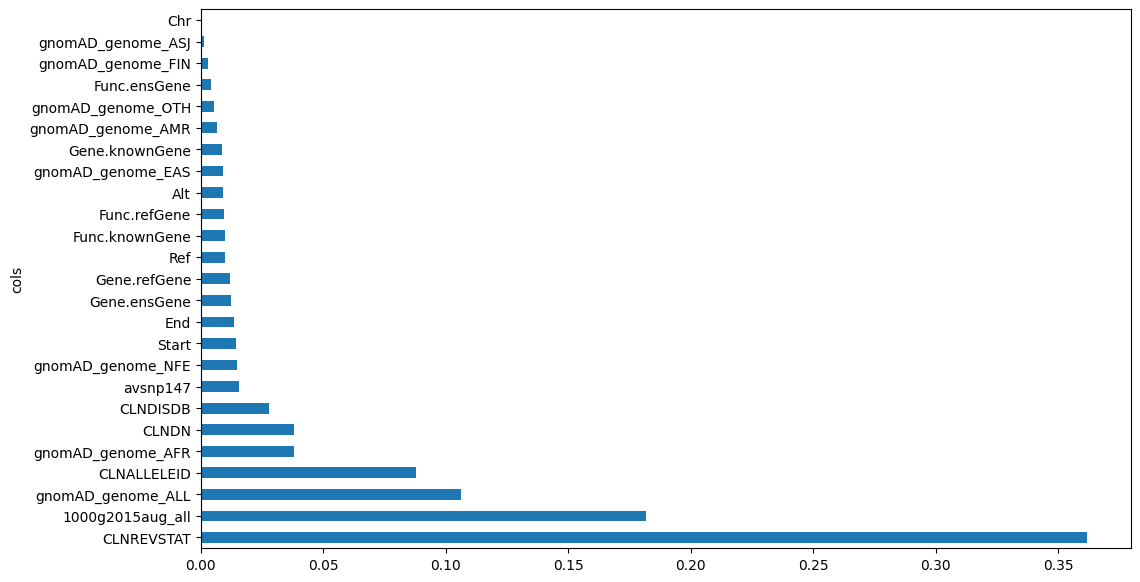

In [67]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30])

- Estraggo le features che impattano sul risultato più dello 0,5%

In [68]:
to_keep = fi[fi.imp>0.005].cols

In [69]:
df_keep = df[to_keep].copy()
df_keep

,CLNREVSTAT,1000g2015aug_all,gnomAD_genome_ALL,CLNALLELEID,gnomAD_genome_AFR,CLNDN,CLNDISDB,avsnp147,gnomAD_genome_NFE,Start,...,Gene.ensGene,Gene.refGene,Ref,Func.knownGene,Func.refGene,Alt,gnomAD_genome_EAS,Gene.knownGene,gnomAD_genome_AMR,gnomAD_genome_OTH
0,"criteria_provided,_single_submitter",0.000998,0.0004,379681,0.0000,not_specified,MedGen:CN169374,rs144752607,0.000000,19956133,...,RIN2,RIN2,G,exonic,exonic,A,0.0074,RIN2,0.0000,0.0000
1,no_assertion_criteria_provided,0.000599,0.0000,188965,0.0000,not_provided,MedGen:CN517202,rs542568224,0.000000,31024150,...,ASXL1,ASXL1,C,exonic,exonic,T,0.0000,ASXL1,0.0000,0.0000
2,"criteria_provided,_single_submitter",0.000998,0.0032,79362,0.0003,"Congenital_ocular_coloboma|Cataract_33,_multiple_types","Human_Phenotype_Ontology:HP:0000589,Human_Phenotype_Ontology:HP:0007767,Human_Phenotype_Ontology:HP:0007995,MONDO:MONDO:0001476,MedGen:C0009363,SNOMED_CT:92828000,SNOMED_CT:93390002|MONDO:MONDO:0012665,MedGen:C3808107,OMIM:611391",rs548358901,0.002700,17474721,...,BFSP1,BFSP1,AA,exonic,exonic,-,0.0000,BFSP1,0.0012,0.0020
3,"criteria_provided,_single_submitter",0.001198,0.0013,728552,0.0008,not_provided,MedGen:CN517202,rs143378274,0.001900,17623770,...,RRBP1,RRBP1,G,exonic,exonic,A,0.0000,RRBP1,0.0012,0.0020
4,"criteria_provided,_single_submitter",0.001597,0.0004,742511,0.0000,not_provided,MedGen:CN517202,rs80097864,0.000000,60903041,...,LAMA5,LAMA5,G,exonic,exonic,A,0.0080,LAMA5,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,"criteria_provided,_multiple_submitters,_no_conflicts",0.090056,0.0552,349799,0.1609,Corneal_dystrophy|Corneal_dystrophy-perceptive_deafness_syndrome|not_provided,"Human_Phenotype_Ontology:HP:0001131,Human_Phenotype_Ontology:HP:0007775,MONDO:MONDO:0018102,MedGen:C0010036,Orphanet:ORPHA34533,SNOMED_CT:5587004|MONDO:MONDO:0009015,MedGen:C1857572,OMIM:217400,Orphanet:ORPHA1490|MedGen:CN517202",rs58757394,0.004300,3209012,...,SLC4A11,SLC4A11,C,exonic,exonic,T,0.1211,SLC4A11,0.0167,0.0245
4436,"criteria_provided,_single_submitter",0.018770,0.0187,705561,0.0653,not_provided,MedGen:CN517202,rs34899200,0.000200,55027509,...,CASS4,CASS4,C,exonic,exonic,T,0.0000,CASS4,0.0048,0.0031
4437,"criteria_provided,_multiple_submitters,_no_conflicts",0.001997,0.0009,231101,0.0000,Hypertrophic_cardiomyopathy|not_specified|Cardiovascular_phenotype,"Human_Phenotype_Ontology:HP:0001639,MONDO:MONDO:0005045,MeSH:D002312,MedGen:C0007194,OMIM:PS192600,Orphanet:ORPHA217569|MedGen:CN169374|MedGen:CN230736",rs199840543,0.000000,42788647,...,JPH2,JPH2,G,exonic,exonic,A,0.0167,JPH2,0.0000,0.0000
4438,"criteria_provided,_single_submitter",0.003395,0.0037,728678,0.0128,not_provided,MedGen:CN517202,rs139497051,0.000067,43933416,...,MATN4,MATN4,G,exonic,exonic,A,0.0000,MATN4,0.0012,0.0000


- Riaddestramento della rete con solo le nuove colonne

In [71]:
num_cols = df_keep.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_keep.select_dtypes(include=[object]).columns.tolist()
df = pd.concat([df['CLNSIG'], df_keep], axis=1)
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))

In [73]:
to = TabularPandas(df, procs=[Categorify, FillMissing],
                   cat_names = cat_cols,
                   cont_names = num_cols,
                   y_names='CLNSIG',
                    y_block=CategoryBlock(),
                   splits=splits)

In [74]:
dls = to.dataloaders(bs=1024)

In [75]:
learn = tabular_learner(dls, metrics=accuracy, loss_func=FocalLossFlat(gamma=3))

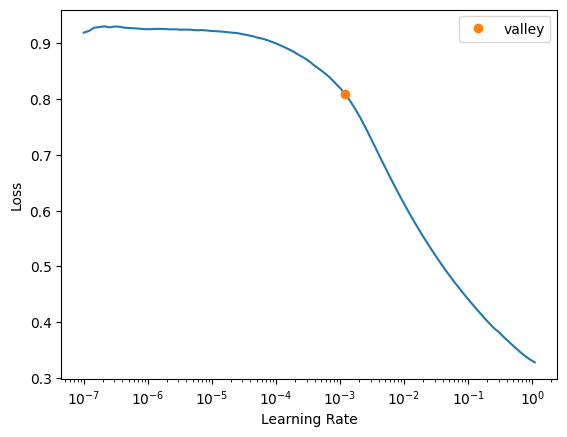

In [76]:
lr = learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.004932,0.492114,0.852477,00:00
1,0.004177,0.447605,0.868243,00:00
2,0.003716,0.407666,0.853604,00:00
3,0.003288,0.369363,0.853604,00:00
4,0.002937,0.335678,0.855856,00:00
5,0.002686,0.307219,0.853604,00:00
6,0.002461,0.286574,0.846847,00:00
7,0.002231,0.269231,0.842342,00:00
8,0.002052,0.259481,0.838964,00:00
9,0.001896,0.253543,0.840090,00:00


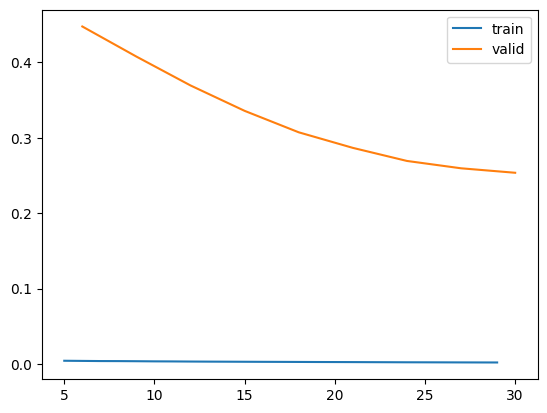

In [78]:
learn.fit(10, lr)
learn.recorder.plot_loss()

- Pulizia del dei dati sul cromosoma 22 allo stesso modo del cromosoma 21 per utilizzarlo come test set

In [82]:
test_df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')
test_df = test_df.apply(lambda x: x.str.split(';') if x.dtype == "object" else x)
test_df = test_df.map(lambda x: x.remove('') if type(x) is list and '' in x else x)

l = []

for col in test_df.columns:
    if test_df[col].apply(lambda x: len(x) if type(x) is list else list()).equals(test_df['aapos'].apply(lambda x: len(x) if type(x) is list else list())):
        l.append(col)

l.append('TSL')
test_df = test_df.explode(l)
test_df = test_df.map(lambda x: x[0] if type(x) is list and len(x) == 1 else x)
test_df.replace(to_replace='.', value=np.nan, inplace=True)
test_df.dropna(axis='rows', how='any', inplace=True, subset=['clinvar_clnsig'])
test_df.dropna(axis='columns', thresh=int(len(test_df.index)*0.8), inplace=True)
test_df = test_df.apply(pd.to_numeric, errors='ignore')


l1 = []

for col in test_df.columns:
    if test_df[col].map(lambda x: True if type(x) is list else False).any():
        l1.append(col)

for col in l1:
    v = test_df[col].explode().value_counts()
    toRemove = v[v < int(len(test_df[col].explode()) * 0.10)].index
    test_df[col] = test_df[col].map(lambda x: [i for i in x if i not in toRemove] if type(x) is list else x)


dict = {}
for col in l1:
    v = test_df[col].explode().unique()
    dict[col] = {"Valori unici": len(v), "Esempi": v[0:10]}

test_df.drop(['HPO_id', 'HPO_name', 'MGI_mouse_phenotype'], axis=1, inplace=True)
dict.pop('HPO_id')
dict.pop('HPO_name')
dict.pop('MGI_mouse_phenotype')

def check_empty(x):
    for i in x:
        if i != ' ' and type(i) != float:
            return False
    return True

for key, value in dict.items():
    if value['Valori unici'] > 10 or value['Valori unici'] == 1 or check_empty(value['Esempi']):
        print(key)
        test_df.drop(key, axis=1, inplace=True)
    else:
        v = sorted(test_df[key].explode().replace(to_replace=np.nan, value= 'NaT').unique())
        for c in v:
            if c == 'NaT':
                c = key + '_NaT'
            test_df[c] = test_df[key].replace(to_replace=np.nan, value= 'NaT').apply(lambda lis: int(c in lis))
        test_df.drop(key, axis=1, inplace=True)

/tmp/ipykernel_629/3892441711.py:1: DtypeWarning: Columns (98,99,101,102,131,132,133,134,135,136,153,154,155,169,170,171,172,646,650,651,675,676,677,678,679,681,682,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,705,706,717,718,719,720,721,722,723,724,725,730) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('clinvar.22.dbnsfp.vcf', sep='\t')


MutationTaster_score
MutationTaster_AAE
Gene_other_names
Uniprot_acc(HGNC/Uniprot)
CCDS_id
Refseq_id
Pathway(ConsensusPathDB)
Orphanet_disorder_id
Orphanet_disorder
GO_molecular_function


- Aggiunta delle colonne del dataset del cromosoma 21 che mancano all'interno del 22 (i valori mancanti sono riempiti con 0) e raggruppamento delle variabili target 

In [83]:
test_df.rename({'clinvar_clnsig': 'CLNSIG'}, axis='columns', inplace=True)

cols = [col for col in df.columns if col not in test_df.columns]
for col in cols:
    test_df[col] = 0

cols = [col for col in df.columns if col in test_df.columns]
test_df = test_df[cols]

test_df.apply(pd.to_numeric, errors='ignore')
test_df.dropna(axis='rows', how='any', inplace=True, subset=['CLNSIG'])
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'not_provided'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'protective'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'Conflicting_interpretations_of_pathogenicity,_risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'Conflicting_interpretations_of_pathogenicity,_other,_risk_factor'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'drug_response'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'association'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'Affects'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'other'].index, inplace=True)
test_df.drop(axis='index', labels=test_df[test_df.CLNSIG == 'drug_response,_risk_factor'].index, inplace=True)
test_df.replace(to_replace='Conflicting_interpretations_of_pathogenicity', value='Uncertain_significance', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Likely_benign,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Likely_benign,_drug_response,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign,_other', value='Likely_benign', inplace=True)
test_df.replace(to_replace='Pathogenic/Likely_pathogenic', value='Likely_pathogenic', inplace=True)
test_df.replace(to_replace='Benign/Likely_benign,_risk_factor', value='Likely_pathogenic', inplace=True)
test_df.replace(to_replace=np.nan, value=0, inplace=True)
test_df.reset_index(drop=True, inplace=True)
test_dl = dls.test_dl(test_df)
learn.validate(dl=test_dl)

(#2) [0.5767804980278015,0.736173152923584]

In [85]:
test_df.shape

(37843, 22)

- Analisi dei risultati

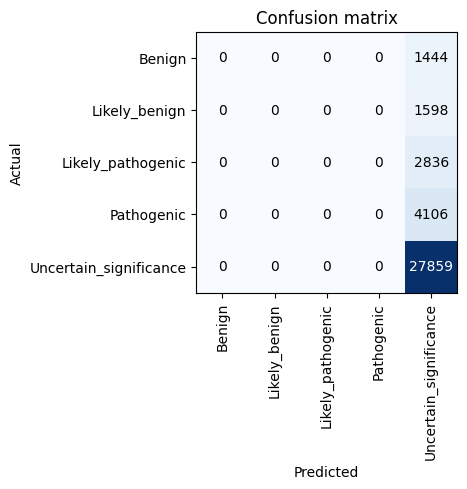

In [84]:
interp = ClassificationInterpretation.from_learner(learn, dl=test_dl)
interp.plot_confusion_matrix()